In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math

# Network Science Exam (Part II)
---

<font color="darkblue"><b>INSTRUCTION</b></font>: In this exam, you may open your notes and use the notebooks released in class, but make sure you **cite your sources**, especially if you use code written by someone else. Although this is an open-notes exam, you are **not allowed to communicate and discuss with anyone** (especially not your classmates/LT-mates) while taking this exam. You are not to use any of these communication platforms (e.g. Discord, MS Teams, Signal, Telegram, Facebook, email, etc.) while taking the exam. If you have questions/clarifications about the exam, please message the instructor immediately (or any of the program staff members) via Zoom chat. Reminding everyone that AIM does not condone academic cheating/dishonesty **in any form**. Cheating in this exam, in particular, may get you expelled from the Institute.

---
## A. Loading the Network (**5 pts**)
Load the files `anon_nodes.csv` and `anon_edges.csv` that contain the nodes and edges of our *social network*, respectively. 

1. Build the corresponding network (**2 pts**)    

In [4]:
df_nodes = pd.read_csv('anon_nodes.csv')
df_edges = pd.read_csv('anon_edges.csv')

In [5]:
G = nx.Graph()

In [6]:
df_edges.columns

Index(['Source', 'Target'], dtype='object')

In [7]:
G=nx.from_pandas_edgelist(df_edges, "Source", "Target")

In [8]:
print('Number of people in the network:', len(G.nodes))
print('Links:',G.size())

Number of people in the network: 119
Links: 174


2. Add all node attributes (**3 pts**)

In [9]:
attr = df_nodes.set_index('Person').to_dict('index')

In [10]:
attr

{'person1': {'Relevance': 'relevance14',
  'Gender': 'male',
  'Birth Year': 1663,
  'Year of Death': 1731},
 'person2': {'Relevance': 'relevance32',
  'Gender': 'male',
  'Birth Year': 1621,
  'Year of Death': 1694},
 'person3': {'Relevance': 'relevance53',
  'Gender': 'male',
  'Birth Year': 1674,
  'Year of Death': 1751},
 'person4': {'Relevance': 'relevance7',
  'Gender': 'female',
  'Birth Year': 1656,
  'Year of Death': 1659},
 'person5': {'Relevance': 'relevance47',
  'Gender': 'male',
  'Birth Year': 1626,
  'Year of Death': 1697},
 'person6': {'Relevance': 'relevance14',
  'Gender': 'male',
  'Birth Year': 1630,
  'Year of Death': 1713},
 'person7': {'Relevance': 'relevance59',
  'Gender': 'male',
  'Birth Year': 1630,
  'Year of Death': 1691},
 'person8': {'Relevance': 'relevance31',
  'Gender': 'male',
  'Birth Year': 1621,
  'Year of Death': 1688},
 'person9': {'Relevance': 'relevance7',
  'Gender': 'male',
  'Birth Year': 1630,
  'Year of Death': 1664},
 'person10': {'Rele

In [27]:
nx.set_node_attributes(G, attr)

In [313]:
G.nodes['person3']

{'Relevance': 'relevance53',
 'Gender': 'male',
 'Birth Year': 1674,
 'Year of Death': 1751}

## B. Visualizing the Network (**5 pts**)

3. Generate a visualization of the network. (**1 pt**) 

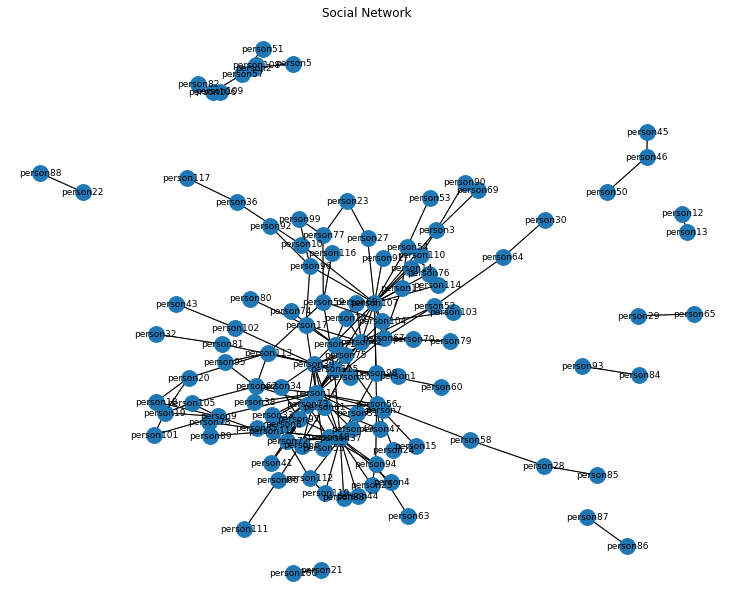

In [51]:
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G, k=0.18)
nc = nx.draw(G, pos=pos, node_size = 250, 
             cmap=plt.cm.RdYlBu);
nx.draw_networkx_labels(G, pos, font_color='black', font_size=9);
nx.draw_networkx_edges(G, pos=pos, alpha=0.500);
plt.title('Social Network');

4. Check if the network is connected. (**1 pt**) 

In [55]:
print(nx.is_connected(G))
print('Network is not connected')

False
Network is not connected


5. If the network is disconnected, extract the giant component. (**2 pts**)

In [94]:
# Solution from Rakesh Chintha on stack overflow 
#https://stackoverflow.com/questions/26105764/
#how-do-i-get-the-giant-component-of-a-networkx-graph

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

print('Giant component is G0 with the following characteristics')
print('Nodes:',len(G0.nodes()))
print('Number of links:', G0.size())



Giant component is G0 with the following characteristics
Nodes: 96
Number of links: 162


6. Visualize the giant component. (**1 pt**)

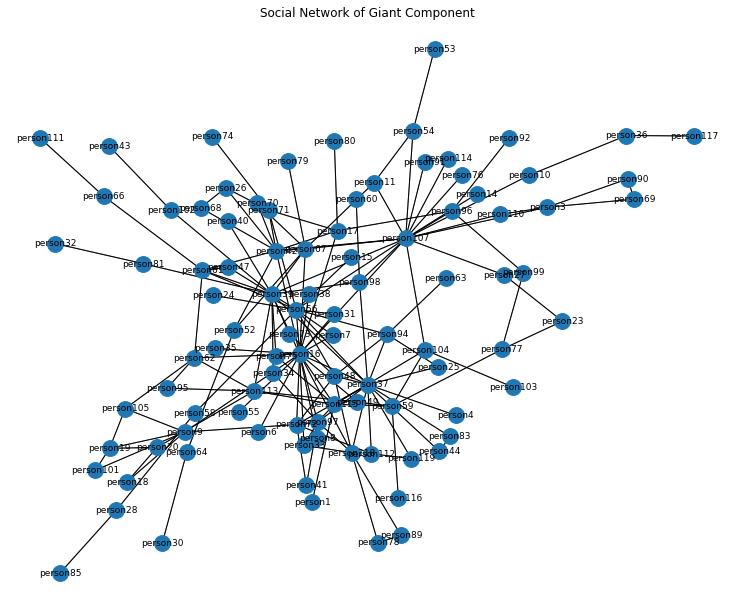

In [88]:
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G0, k=0.18)
nc = nx.draw(G0, pos=pos, node_size = 250, 
             cmap=plt.cm.RdYlBu);
nx.draw_networkx_labels(G0, pos, font_color='black', font_size=9);
nx.draw_networkx_edges(G0, pos=pos, alpha=0.500);
plt.title('Social Network of Giant Component');

## C. Network EDA (**13 pts**)

7. What is the characteristic path length of the entire network? How about that of the giant component? (**2 pts**)

In [167]:
print('CPL of entire network: infinite.')
print('CPL of giant component', (nx.average_shortest_path_length(G.subgraph(Gcc[0]))))

CPL of entire network: infinite.
CPL of giant component 3.3789473684210525


8. Compare the giant component to networks generated using the (a) Watts-Strogatz model, (b) ER model, and (c) BA model. Explain your choice of parameters in generating each network using the corresponding models. (**3 pts**) 

In [227]:
degrees = [k for node, k in nx.degree(G0)]
avg = np.mean(degrees)
print(avg)
print(degrees)

3.375
[8, 3, 10, 1, 2, 18, 22, 13, 3, 2, 3, 2, 2, 4, 1, 8, 1, 16, 1, 3, 9, 4, 6, 4, 7, 2, 3, 2, 3, 6, 2, 3, 2, 2, 1, 1, 13, 1, 2, 1, 2, 5, 1, 5, 7, 1, 5, 1, 4, 3, 6, 2, 6, 1, 1, 2, 2, 2, 5, 4, 2, 3, 2, 5, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 4, 1, 1, 2, 1, 2, 1, 1]


In [270]:
gc = nx.average_clustering(G0)
gl = nx.average_shortest_path_length(G0)

In [268]:
WS = nx.watts_strogatz_graph(n=119, k=3, p=0.15)
cc = nx.average_clustering(WS)
l = nx.average_shortest_path_length(WS)
print(cc, l)

0.0 20.74718701039738


In [278]:
cc_random = nx.average_clustering(nx.gnm_random_graph(len(WS.nodes()), len(WS.edges()), seed=22))
l_random = 'disconnected'
print(cc_random, 'disconnected')

0.006182472989195678 disconnected


In [276]:
ba_model = nx.barabasi_albert_graph(n=119, m=22)
ba_c = nx.average_clustering(ba_model)
ba_path = nx.average_shortest_path_length(ba_model)

Choice of Parameters:
- **Watts-Strogatz**: $n$ is 119, same as nodes of original network. $k$ is 22. I chose 22 because it is the max degree in the original network. If the smallest degree was chosen, it might not replicate the hubs. $p$=0.15 was chosen arbitrarily since it is random.
- **Erdos-Renyi** and **Albert-Barabasi**: same parameters as Watts-Strogatz for easier comparison.

In [279]:
pd.DataFrame([[gc, gl], [cc, l], [cc_random, l_random], [ba_c, ba_path]], 
            index=['Giant Network', 'Watts-Strogatz', 
                   'Erdos-Renyi', 'Barabasi-Albert'],
            columns = ['Clustering Coefficient', 'CPL'])

,Clustering Coefficient,CPL
Giant Network,0.281254,3.37895
Watts-Strogatz,0.000000,20.7472
Erdos-Renyi,0.006182,disconnected
Barabasi-Albert,0.409060,1.6962


What can you say about the average clustering coefficient of the networks? (**4 pts**) 

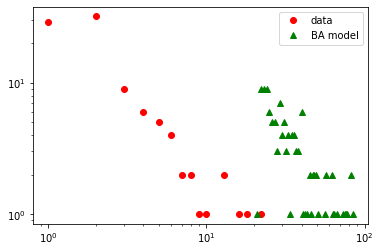

In [283]:
plt.loglog(nx.degree_histogram(G0),'ro', label="data");
plt.loglog(nx.degree_histogram(ba_model),'g^', label="BA model");
plt.legend();

Clustering coefficient is the highest in the Barabasi-Albert model. The BA model aimed to capture aimed to capture the degree distribution of the original network so the Clustering coefficient is higher in this model.

How about the characteristic path length? (**4 pts**)

Immediate observation shows the following:
- We cannot compute the CPL for ER because the whole network itself is disconnected
- Watts Strogatz has the highest path length as it tried to connect all nodes in the network
- Closest CPL is the original analysis of the giant network and BA model, as they had similar distributions

## D. Network Modeling (**8 pts**)

9. If you were to use a network model to reconstruct certain features of the giant component, which model would you use and why? (**5 pts**)

Based on the results of my analysis above, I would probably use the Barabasi-Albert model. It observes a real-world degree distribution. If i wanted to study social networks, this would be a good baseline to start with as it can capture real-world characteristics even though it is random.

10. Show the resulting proposed network (your answer in 9) and some network properties. (**3 pts**)

In [290]:
avg

3.375

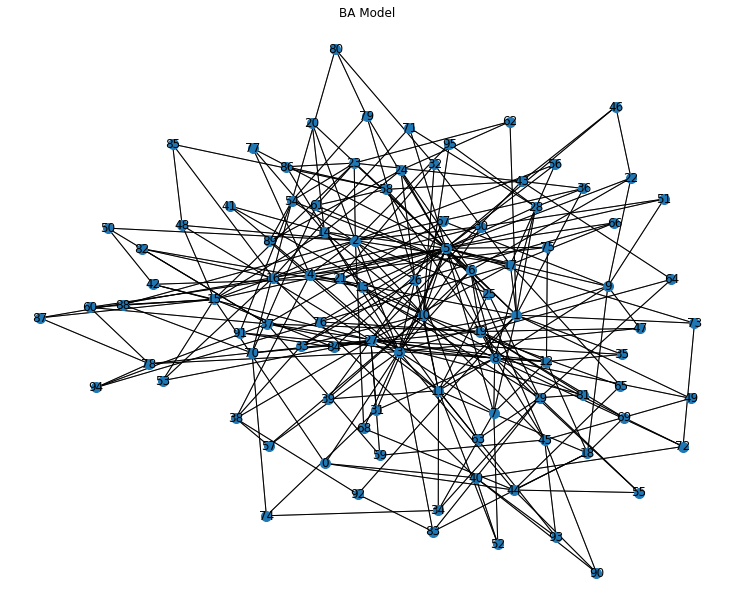

In [309]:
plt.figure(figsize=(10,8))
ba_model = nx.barabasi_albert_graph(n=96, m=3)
pos = nx.fruchterman_reingold_layout(ba_model)
nc = nx.draw(ba_model, pos=pos, node_size = 100, 
             cmap=plt.cm.RdYlBu);
nx.draw_networkx_labels(ba_model, pos, font_color='black');
nx.draw_networkx_edges(ba_model, pos=pos, alpha=0.500);
plt.title('BA Model');

In [310]:
def net_prop(network):
    '''Display basic network properties of the network'''
    
    #Get number of nodes, edges, and number of degrees
    N = network.order()
    L = network.size() 
    avg_deg = float(L) / N 
    
    print ('Basic Properties')
    print ('Nodes: ', N)
    print ('Edges: ', L)
    print ('Average degree: ', avg_deg)
    print('\n')
    
    
    degrees = [degree for degree in nx.degree(network)]
    print("Sorted degrees of nodes")
    print(sorted(degrees, key = lambda x: x[1], reverse=True))

In [311]:
net_prop(ba_model)

Basic Properties
Nodes:  96
Edges:  279
Average degree:  2.90625


Sorted degrees of nodes
[(5, 33), (3, 19), (2, 17), (1, 16), (8, 16), (10, 15), (11, 14), (27, 13), (15, 12), (19, 12), (6, 11), (4, 10), (16, 10), (26, 10), (17, 9), (29, 9), (37, 9), (9, 8), (12, 8), (23, 8), (40, 8), (54, 8), (7, 7), (14, 7), (44, 7), (45, 7), (18, 6), (24, 6), (28, 6), (43, 6), (58, 6), (13, 5), (21, 5), (25, 5), (38, 5), (70, 5), (78, 5), (0, 4), (22, 4), (30, 4), (31, 4), (32, 4), (33, 4), (34, 4), (36, 4), (42, 4), (48, 4), (60, 4), (61, 4), (69, 4), (72, 4), (76, 4), (79, 4), (83, 4), (84, 4), (20, 3), (35, 3), (39, 3), (41, 3), (46, 3), (47, 3), (49, 3), (50, 3), (51, 3), (52, 3), (53, 3), (55, 3), (56, 3), (57, 3), (59, 3), (62, 3), (63, 3), (64, 3), (65, 3), (66, 3), (67, 3), (68, 3), (71, 3), (73, 3), (74, 3), (75, 3), (77, 3), (80, 3), (81, 3), (82, 3), (85, 3), (86, 3), (87, 3), (88, 3), (89, 3), (90, 3), (91, 3), (92, 3), (93, 3), (94, 3), (95, 3)]


## E. What-If Scenario (**13 pts**)

11. What can you say about the empirical network? Any insights? (**3 pts**) 

Basing on the topology, even the farthest nodes have interactions with the most connected nodes in the center, indicating that if a certain information was passed, there is a possibility that info will reach almost all nodes in the network.

12. If this were a contact network, write a letter to the IATF Chairperson DOH Secretary Francisco T. Duque, III suggesting what you think is the best vaccination strategy and why you think it is the best strategy. (**10 pts**)

Dearest DOH Secretary Duque,

Great job on handling the Covid-19 pandemic. 

Nonetheless, might I offer some vaccination strategies for DOH to do so we can more effectively beat this disease.

Some facts:
1. Each individual has a potential to infect at least 3 more people. Overtime, this will increase exponentiatlly, with the likelihood that all people are sure to be infected.

2. May I suggest that we contain the virus by implementing a strict lockdown. While that is happening, we start vaccinating people in the densely packed areas. We do not have to vaccinate everyone.

3. Herd immunity will only work if we vaccinate the right communities. We can start by vaccinating areas that are densely packed. We can at least vaccinate 60 percent of them.

4. DO NOT let others out of containment. It will surely affect the other networks that are not connected to the central one, aka the provinces. 

---

## // End of Part II. End of Exam.

## BONUS

Share below your most favorite session on Network Science (excluding the first two sessions on Complex Systems). Why? 

Prof! My favorite is the discussion on random networks. Before that session I had no idea how to replicate networks, much more get an idea of how probable a node will connect to another node. Random networks allowed me to at least hypothetically visualize how the networks could interact in the real world. Very helpful for a visual person like me!